In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

/Users/rintoj/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


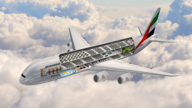

In [2]:
im = PILImage.create('emirates.jpg')
im.to_thumb(192, 192)

In [3]:
#|export
learn = load_learner('model.pkl')

In [4]:
learn.predict(im)

('emirates', tensor(0), tensor([0.9891, 0.0109]))

In [5]:
#|export
categories = ('Emirates', 'Indigo')

def classify_image(img):
  _,_,probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [9]:
classify_image(PILImage.create('emirates.jpg'))

{'Emirates': 0.9890660047531128, 'Indigo': 0.010934021323919296}

In [24]:
# image = gr.inputs.Image(shape=(192, 192))
def greet(a):
  return f"Hello {a}"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch(inline=False, share=False)

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [ ]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['emirates.jpg', 'indigo.jpg']

interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
